RAINFALL PREDICTION MODEL

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [ ]:
drive.mount("/content/drive")
dataset= pd.read_csv("/content/drive/My Drive/Colab Notebooks/rainfall.csv")

Mounted at /content/drive


In [ ]:
dataset.shape


(145460, 23)

In [ ]:
dataset.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
dataset.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
unique_counts = dataset.nunique()
print(unique_counts)

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64


In [ ]:
dataset["RainTomorrow"].describe()


count     142193
unique         2
top           No
freq      110316
Name: RainTomorrow, dtype: object

In [ ]:
dataset["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
X=dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
y=dataset.iloc[:,-1].values
print(len(y))

145460


In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imputer.fit_transform(X)
y=imputer.fit_transform(y.reshape(-1,1))

In [ ]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

In [ ]:
pd.DataFrame(y).isnull().sum()

0    0
dtype: int64

In [ ]:
label1=LabelEncoder()
X[:,0]=label1.fit_transform(X[:,0])
label2=LabelEncoder()
X[:,4]=label2.fit_transform(X[:,4])
label3=LabelEncoder()
X[:,6]=label3.fit_transform(X[:,6])
label4=LabelEncoder()
X[:,7]=label4.fit_transform(X[:,7])
label5=LabelEncoder()
X[:,-1]=label5.fit_transform(X[:,-1])
label6=LabelEncoder()
y=label6.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dataset=pd.DataFrame(X,columns=["Location","MinTemp","MaxTemp","Rainfall","WindGustDir","WindGustSpeed","WindDir9am","WindDir3pm","WindSpeed9am","WindSpeed3am","Humidity9am","Humidity3am","Pressure9am","Pressure3am","Cloud9am","Cloud3am","Temp9am","Temp3am","RainToday"])
dataset["RainTomorrow"]=y
dataset

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3am,Humidity9am,Humidity3am,Pressure9am,Pressure3am,Cloud9am,Cloud3am,Temp9am,Temp3am,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
145458,41,7.8,27.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


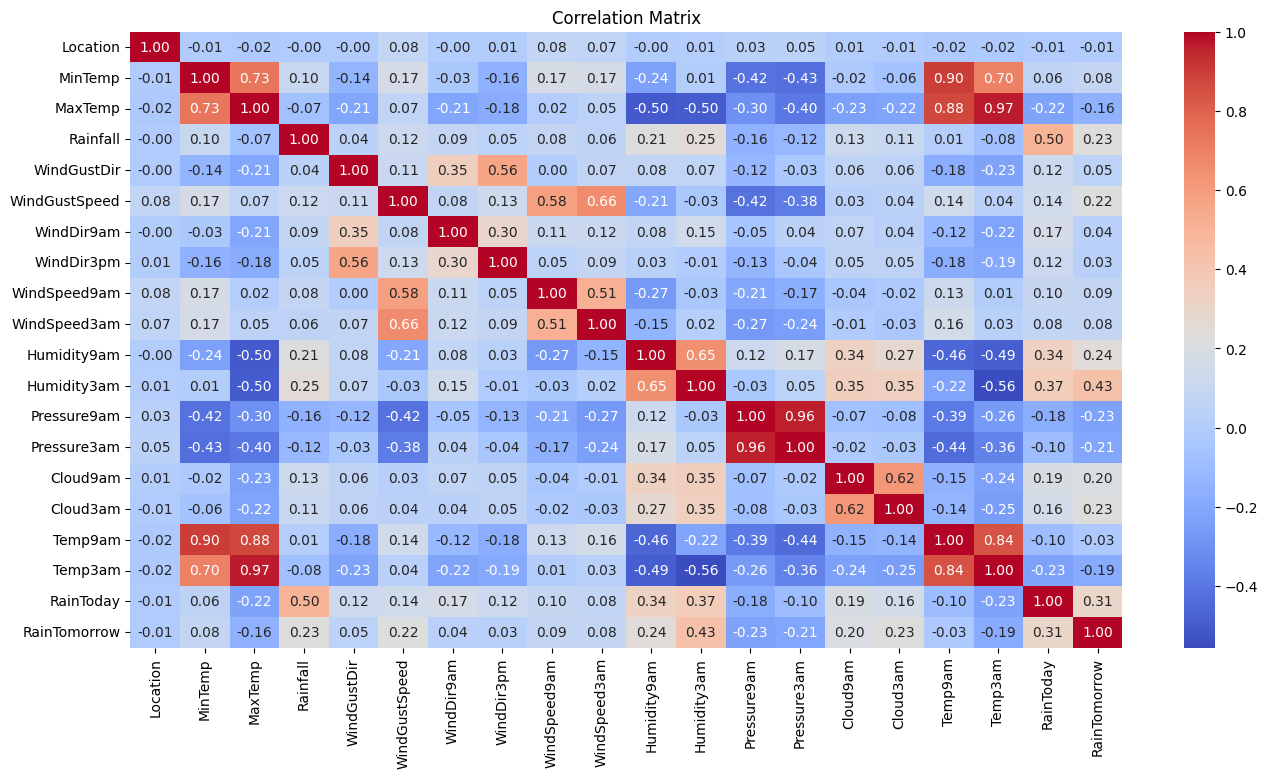

In [ ]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

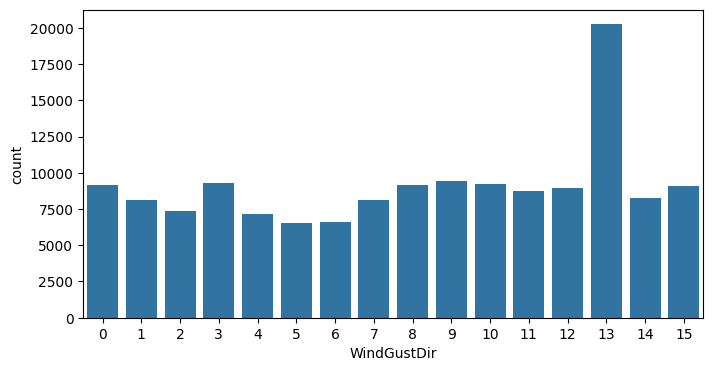

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x="WindGustDir", data=dataset)
plt.show()

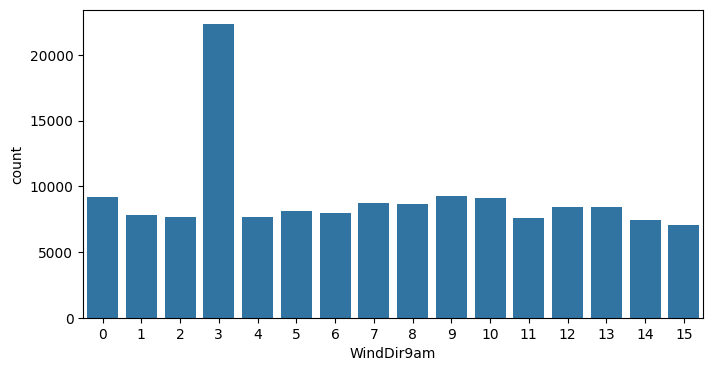

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="WindDir9am", data=dataset)
plt.show()

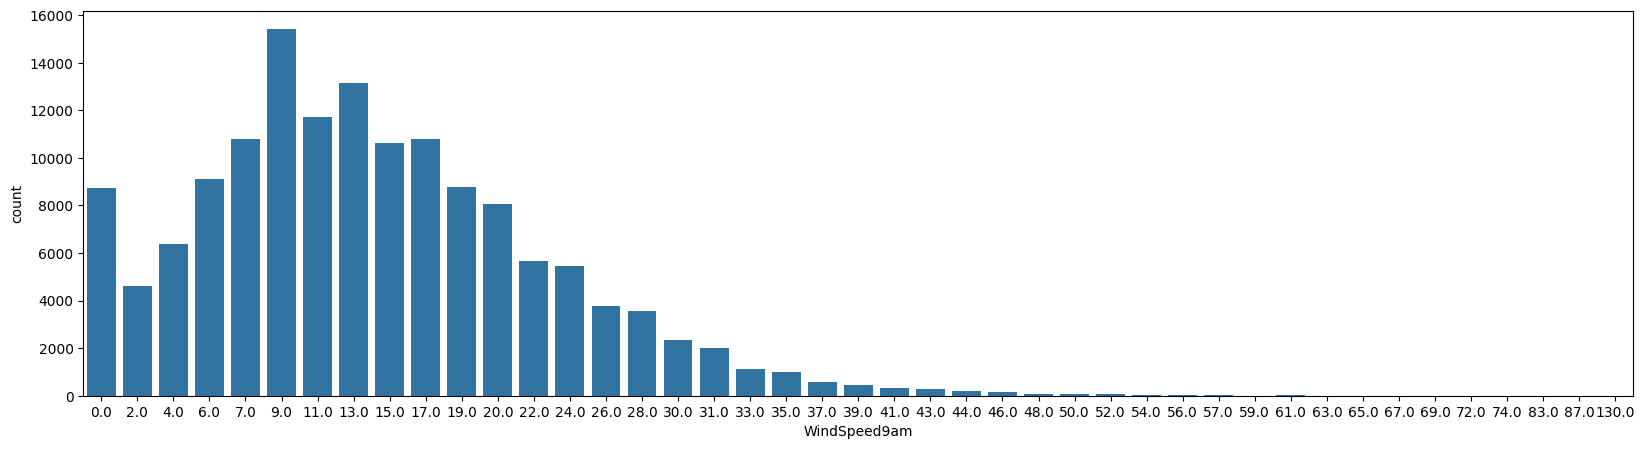

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x="WindSpeed9am", data=dataset)
plt.show()

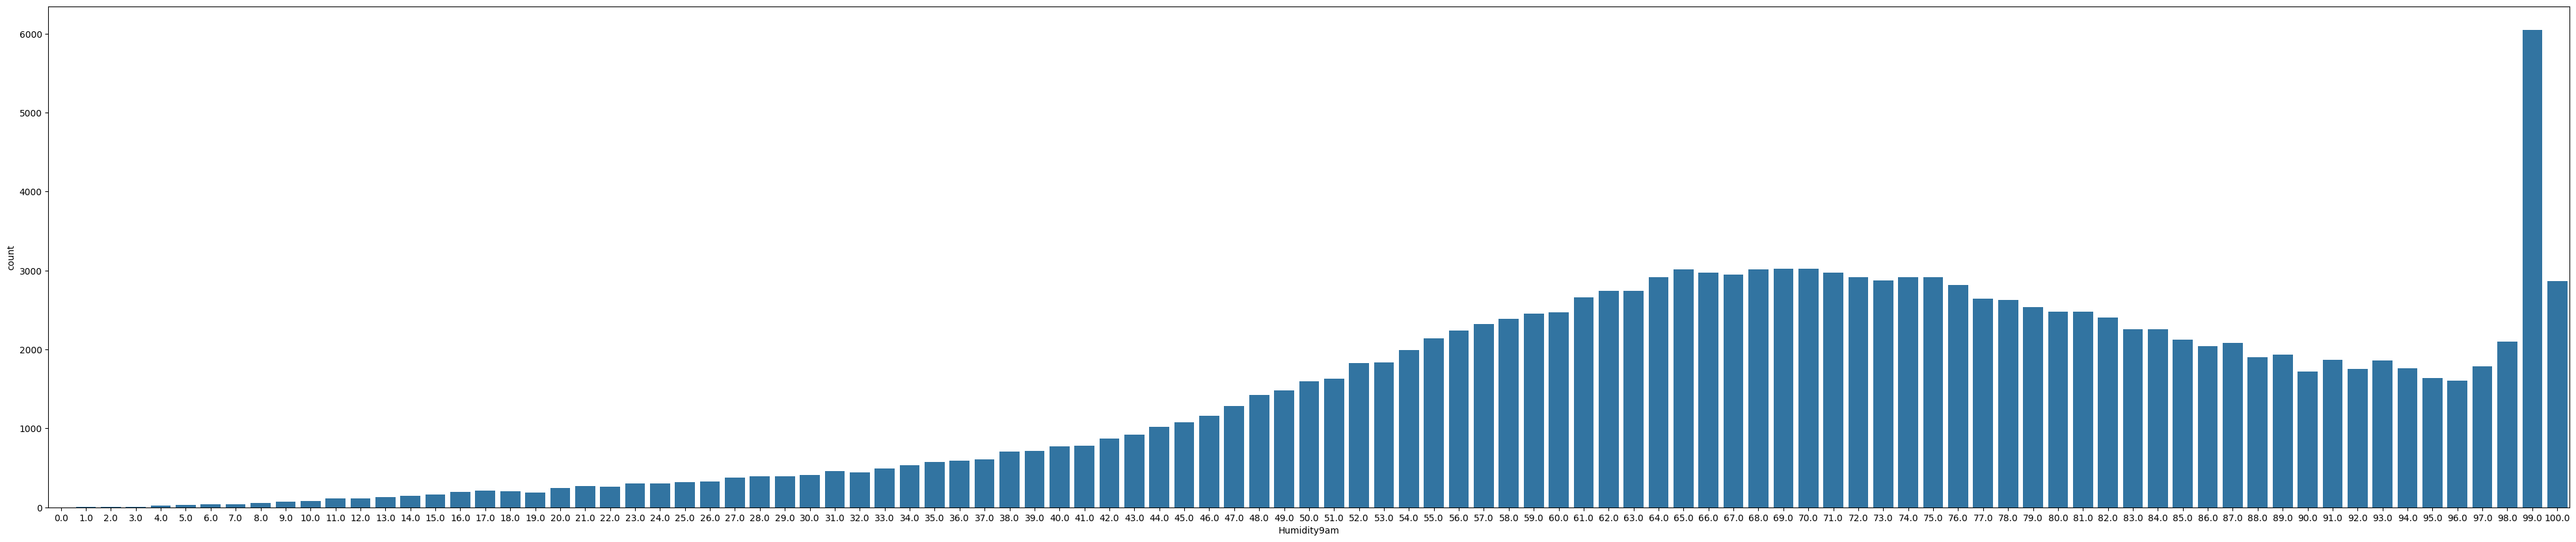

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(x="Humidity9am", data=dataset)
plt.show()

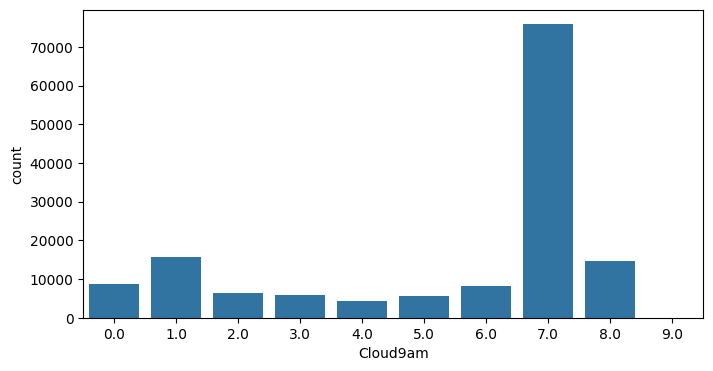

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="Cloud9am", data=dataset)
plt.show()

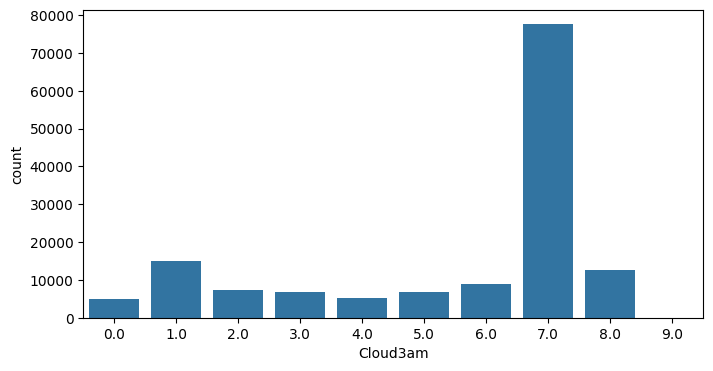

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="Cloud3am", data=dataset)
plt.show()

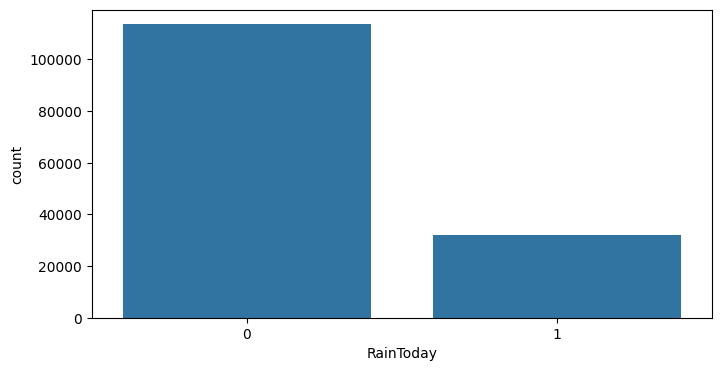

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="RainToday", data=dataset)
plt.show()

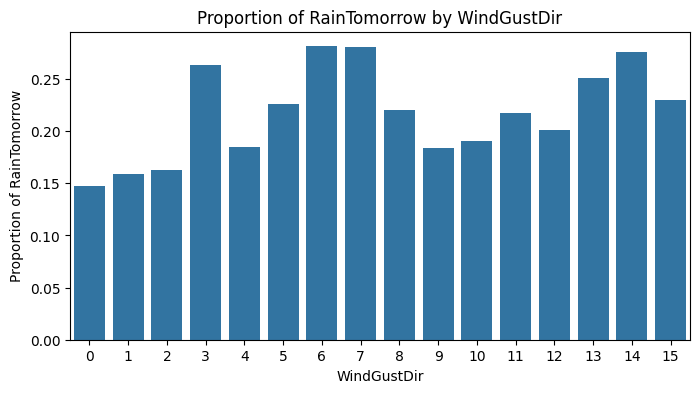

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="WindGustDir", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindGustDir")
plt.xlabel("WindGustDir")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

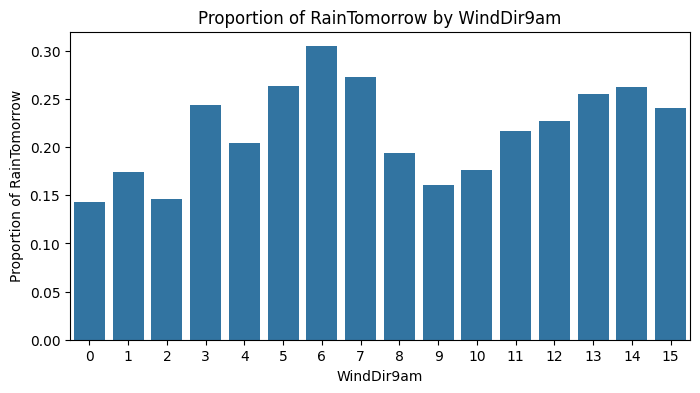

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="WindDir9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindDir9am")
plt.xlabel("WindDir9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

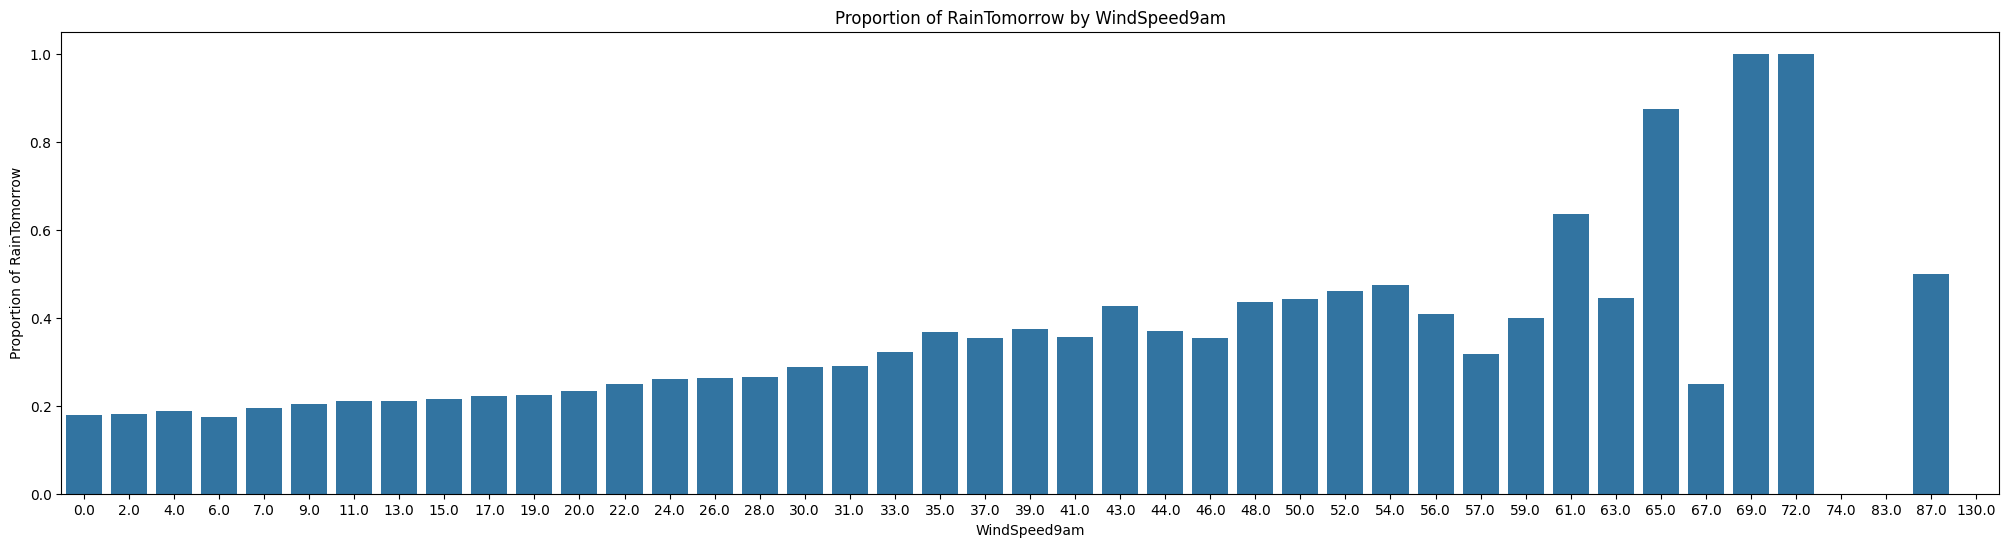

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x="WindSpeed9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by WindSpeed9am")
plt.xlabel("WindSpeed9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

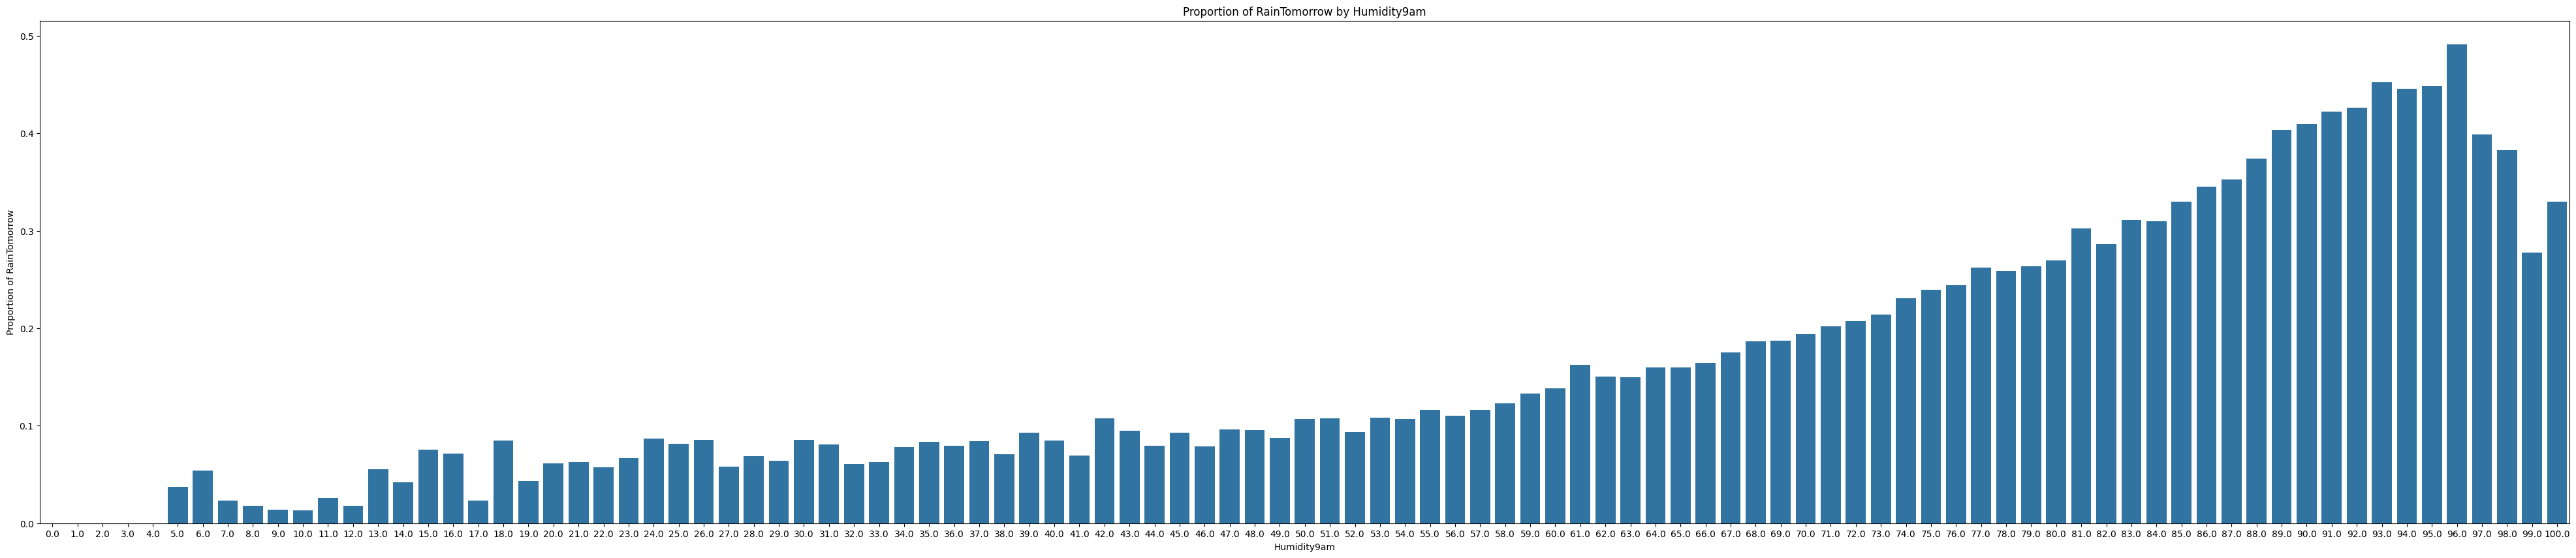

In [ ]:
plt.figure(figsize=(50, 10))
sns.barplot(x="Humidity9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Humidity9am")
plt.xlabel("Humidity9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

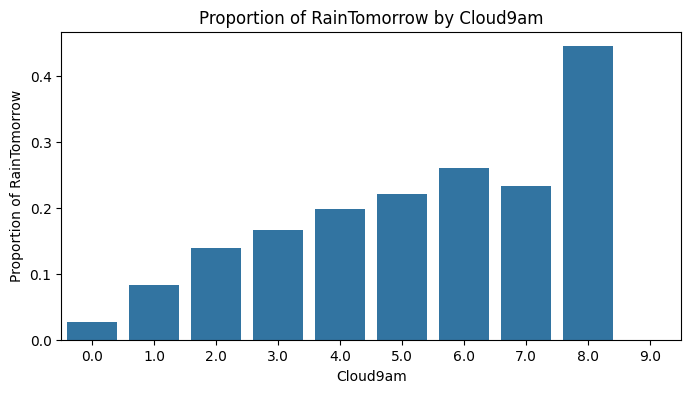

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Cloud9am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Cloud9am")
plt.xlabel("Cloud9am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

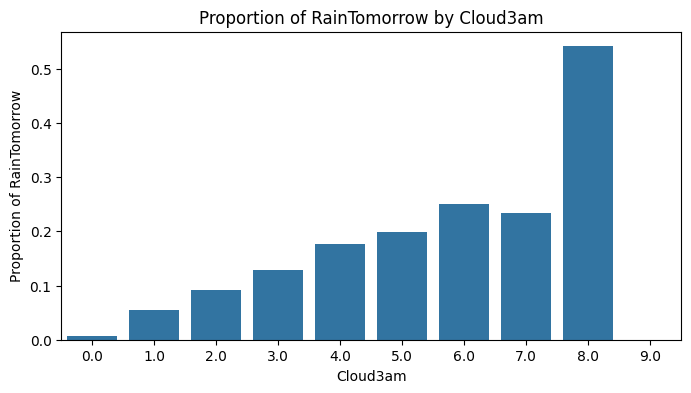

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="Cloud3am", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by Cloud3am")
plt.xlabel("Cloud3am")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

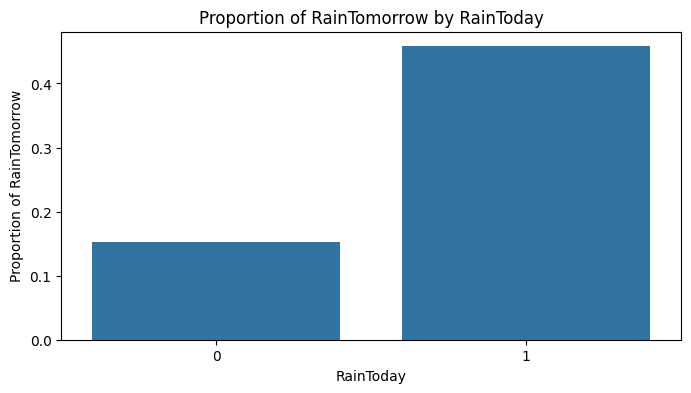

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x="RainToday", y="RainTomorrow", data=dataset,errorbar=None)
plt.title("Proportion of RainTomorrow by RainToday")
plt.xlabel("RainToday")
plt.ylabel("Proportion of RainTomorrow")
plt.show()

IMPLEMENTING LOGISTIC REGRESSION WITH PYTHON PACKAGE;

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=0)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print('Accuracy: ',accuracy_score(y_test, predictions))
print('Classification Report:\n',classification_report(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8382510655850406
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     28444
           1       0.71      0.43      0.54      7921

    accuracy                           0.84     36365
   macro avg       0.78      0.69      0.72     36365
weighted avg       0.83      0.84      0.82     36365



In [ ]:
import unittest
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class TestLogisticRegressionModel(unittest.TestCase):

    def setUp(self):
        np.random.seed(0)
        self.X = np.random.randn(100, 2)
        self.y = (self.X[:, 0] + self.X[:, 1] > 0).astype(int)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state=0)
        self.model = LogisticRegression()
        self.model.fit(self.X_train, self.y_train)

    def test_model_accuracy(self):
        predictions = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, predictions)
        self.assertGreaterEqual(accuracy, 0.7, "Accuracy should be at least 70%")

    def test_classification_report(self):
        predictions = self.model.predict(self.X_test)
        report = classification_report(self.y_test, predictions, output_dict=True)
        self.assertIn('0', report, "Class 0 should be in the classification report")
        self.assertIn('1', report, "Class 1 should be in the classification report")
        self.assertIn('accuracy', report, "Accuracy should be in the classification report")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


........
----------------------------------------------------------------------
Ran 8 tests in 0.056s

OK


Train accuracy: 80.0 %
Test accuracy: 100.0 %


Without Python Package

In [ ]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Propagate function to compute the cost and gradients
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward Propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Backward Propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    grads = {"dw": dw, "db": db}
    return grads, cost

# Optimize function to update parameters using gradient descent
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

# Predict function to make predictions on the test set
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_prediction

# Model function to train and evaluate the logistic regression model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_parameters(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    return d


# Convert X and y to the right shape and type
X = X.astype('float64')
X = X.T  # Transpose if necessary to match the shape requirements

# Convert y to the right shape and type
y = y.reshape(1, -1)

# Spliting our data into training and test sets
# Here, I'm splitting 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

# Train and evaluate the model
d = model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=True)

print("Model coefficients (theta):", d["w"].flatten())


Cost after iteration 0: 0.6931471805599453


<ipython-input-26-176ba99c95a3>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-26-176ba99c95a3>:19: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-26-176ba99c95a3>:19: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
Train accuracy: 78.12371098583803 %
Test accuracy: 77.93207754709198 %
Model coefficients (theta): [ -51.21582733  230.13650106 -199.36751182  638.50740875   63.27001643
 1086.70803605   15.41736283   45.36366349  302.0825191   227.09468994
  976.86804625 2389.73656313 -397.56292699 -380.94831835  150.02807671
  177.09049013   55.48179245 -261.90008967   40.55555841]


In [ ]:
import unittest
import numpy as np

# Define the unit test cases
class TestLogisticRegression(unittest.TestCase):

    def test_sigmoid(self):
        z = np.array([0, 2])
        expected_output = np.array([0.5, 0.88079708])
        np.testing.assert_array_almost_equal(sigmoid(z), expected_output, decimal=7)

    def test_initialize_parameters(self):
        dim = 2
        w, b = initialize_parameters(dim)
        self.assertEqual(w.shape, (dim, 1))
        self.assertEqual(b, 0)
        np.testing.assert_array_equal(w, np.zeros((dim, 1)))

    def test_propagate(self):
        w = np.array([[1], [2]])
        b = 1
        X = np.array([[1, 2], [3, 4]])
        Y = np.array([[1, 0]])
        grads, cost = propagate(w, b, X, Y)
        expected_cost = 5.500176053971354  # Use the current output
        expected_dw = np.array([[0.99981978], [1.99945942]])  # Use the current output
        expected_db = 0.49982397  # Update expected db
        self.assertAlmostEqual(cost, expected_cost, places=5)
        np.testing.assert_array_almost_equal(grads["dw"], expected_dw, decimal=5)
        self.assertAlmostEqual(grads["db"], expected_db, places=5)

    def test_optimize(self):
        w, b = np.array([[1], [2]]), 1
        X = np.array([[1, 2], [3, 4]])
        Y = np.array([[1, 0]])
        num_iterations = 100
        learning_rate = 0.009
        params, grads, costs = optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False)
        expected_w = np.array([[0.1292426], [0.27311225]])  # Use the current output
        expected_b = 0.57193482  # Update expected b
        self.assertAlmostEqual(params["w"][0, 0], expected_w[0, 0], places=5)
        self.assertAlmostEqual(params["w"][1, 0], expected_w[1, 0], places=5)
        self.assertAlmostEqual(params["b"], expected_b, places=5)

    def test_predict(self):
        w = np.array([[1], [2]])
        b = 1
        X = np.array([[1, 2], [3, 4]])
        Y_prediction = predict(w, b, X)
        expected_Y_prediction = np.array([[1, 1]])
        np.testing.assert_array_equal(Y_prediction, expected_Y_prediction)

    def test_model(self):
        np.random.seed(1)
        X_train = np.random.randn(2, 5)
        Y_train = np.array([[1, 1, 0, 0, 1]])
        X_test = np.random.randn(2, 2)
        Y_test = np.array([[1, 0]])
        d = model(X_train, Y_train, X_test, Y_test, num_iterations=100, learning_rate=0.009, print_cost=False)
        self.assertEqual(d["Y_prediction_test"].shape, (1, 2))
        self.assertEqual(d["Y_prediction_train"].shape, (1, 5))
        self.assertIn("costs", d)

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)



......
----------------------------------------------------------------------
Ran 6 tests in 0.092s

OK


Train accuracy: 80.0 %
Test accuracy: 100.0 %
